<a href="https://colab.research.google.com/github/Eren1995/sales_dataAnalyst/blob/main/arima_cluster_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import files
#uploaded = files.upload()

# Setelah file diunggah, Anda bisa membaca file tersebut seperti biasa
sales_df = pd.read_csv('top_10_cluster_0_2.csv',delimiter=';')

# Menghapus kolom-kolom yang tidak diperlukan

print('Shape of data',sales_df.shape)
sales_df.head()

# Split the single column into multiple columns
#new_salesdf = sales_df[0].str.split(';', expand=True)
# Assign column names
#new_salesdf.columns = ['sk_waktu', 'sk_customer', 'sk_sales', 'benang', 'jenisKain', '

Shape of data (47, 8)


,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga
0,20180109,4,16,30CE,S/K,PUTIH,511,32448500
1,20180109,4,16,30CE,S/K,PUTIH,512,32512000
2,20180111,39,1,30CE,S/K,PUTIH,170,6487360
3,20180115,42,14,30CE,S/K,PUTIH,23,1622880
4,20180131,44,14,30CE,S/K,PUTIH,300,20448960


In [ ]:
#chek header datatype
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sk_waktu    47 non-null     int64
 1   totalHarga  47 non-null     int64
dtypes: int64(2)
memory usage: 880.0 bytes


In [ ]:
print(sales_df.columns)

Index(['sk_waktu', 'totalHarga'], dtype='object')


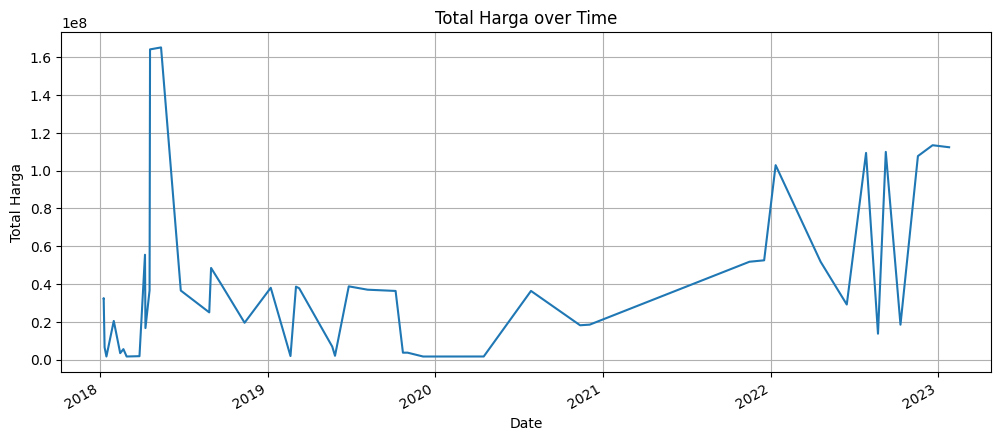

In [ ]:
#step 2
sales_df['sk_waktu'] = pd.to_datetime(sales_df['sk_waktu'], format='%Y%m%d')
sales_df.set_index('sk_waktu', inplace=True)

# Set 'sk_waktu' as the index

# Plot totalHarga against sk_waktu
sales_df['totalHarga'].plot(figsize=(12, 5), title='Total Harga over Time')
plt.xlabel('Date')
plt.ylabel('Total Harga')
plt.grid(True)
plt.show()

In [ ]:
#step 3
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    # Perform ADF test
    dftest = adfuller(dataset, autolag='AIC')

    # Print ADF test results
    print("1. ADF Statistic: ", dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. Number of Lags Used: ", dftest[2])
    print("4. Number of Observations Used for ADF Regression:", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

    # Check for stationarity based on the p-value
    if dftest[1] <= 0.05:
        print("Result: Series is stationary (Reject Null Hypothesis)")
    else:
        print("Result: Series is not stationary (Fail to Reject Null Hypothesis)")

# Example usage:
# Assuming sales_df['totalHarga'] is your time series data
ad_test(sales_df['totalHarga'])

1. ADF Statistic:  -4.1184728136100395
2. P-Value:  0.0009026258845616095
3. Number of Lags Used:  0
4. Number of Observations Used for ADF Regression: 46
5. Critical Values:
	 1% :  -3.5812576580093696
	 5% :  -2.9267849124681518
	 10% :  -2.6015409829867675
Result: Series is stationary (Reject Null Hypothesis)


<Axes: title={'center': 'Total Harga Time Series'}, xlabel='sk_waktu'>

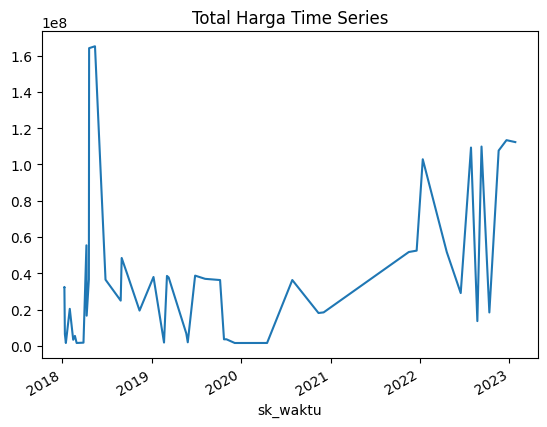

In [ ]:
#check plot after ad_test
sales_df['totalHarga'].plot(title='Total Harga Time Series')

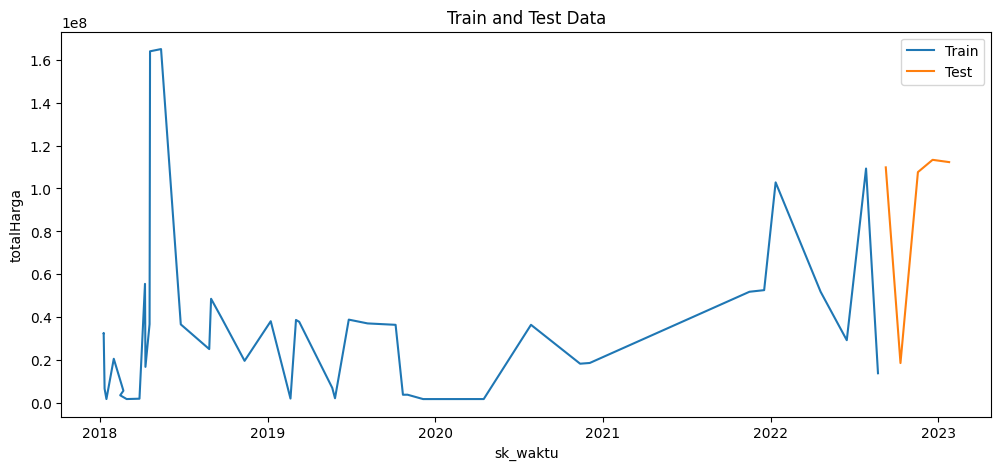

In [ ]:
#step 4
# Tentukan jumlah hari untuk data uji
test_days = 5

# Tentukan titik waktu untuk pemisahan data
split_point = sales_df.index[-test_days]

# Buat mask untuk data pelatihan dan pengujian
msk = (sales_df.index < split_point)
df_train = sales_df[msk][['sk_waktu', 'totalHarga']].copy()
df_test = sales_df[~msk][['sk_waktu', 'totalHarga']].copy()

df_train['sk_waktu'] = pd.to_datetime(df_train['sk_waktu'], format='%Y%m%d')
df_test['sk_waktu'] = pd.to_datetime(df_test['sk_waktu'], format='%Y%m%d')


# Plot data train dan test dalam satu plot
plt.figure(figsize=(12, 5))
plt.plot(df_train['sk_waktu'], df_train['totalHarga'], label='Train')
plt.plot(df_test['sk_waktu'], df_test['totalHarga'], label='Test')
plt.xlabel('sk_waktu')
plt.ylabel('totalHarga')
plt.title('Train and Test Data')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

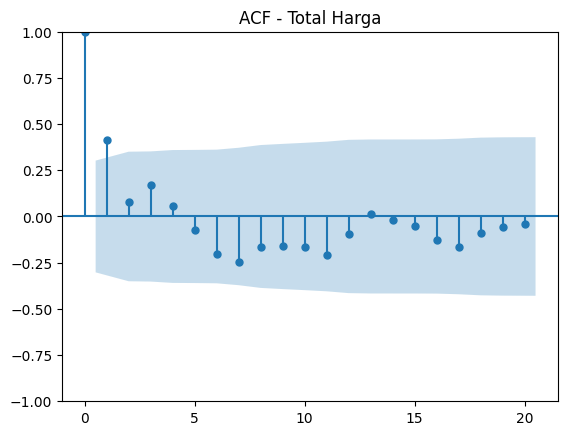

<Figure size 1200x600 with 0 Axes>

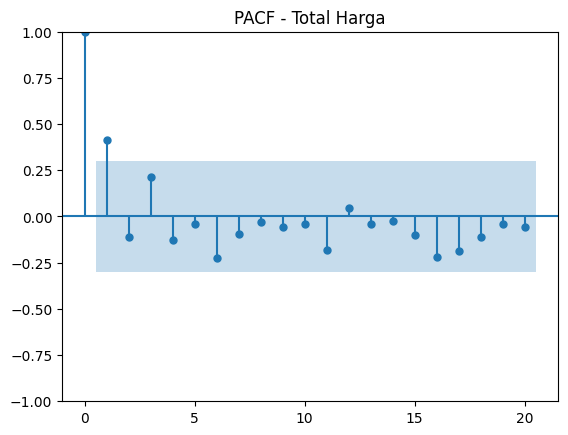

In [ ]:
#step 5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming df_train['totalHarga'] is your time series data
totalHarga_series = df_train['totalHarga']

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(totalHarga_series, lags=20, title='ACF - Total Harga')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(totalHarga_series, lags=20, title='PACF - Total Harga')
plt.show()

In [ ]:
print(sales_df.dtypes)

In [ ]:
#step 6
from statsmodels.tsa.arima.model import ARIMA

# Ambil kolom yang relevan sebagai seri waktu
# Misalkan kita menggunakan kolom 'totalHarga' sebagai seri waktu
ts = sales_df['totalHarga']

# Memastikan seri waktu dalam format numerik
ts = pd.to_numeric(ts)

# Membangun dan menyesuaikan model ARIMA
model = ARIMA(ts, order=(2, 0, 2))
model_fit = model.fit()

# Mencetak ringkasan model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             totalHarga   No. Observations:                   47
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -887.264
Date:                Sun, 11 Aug 2024   AIC                           1786.528
Time:                        08:47:28   BIC                           1797.629
Sample:                             0   HQIC                          1790.705
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.056e+07      0.001   5.15e+10      0.000    4.06e+07    4.06e+07
ar.L1          0.5811    108.317      0.005      0.996    -211.716     212.879
ar.L2          0.0801     75.667      0.001      0.9

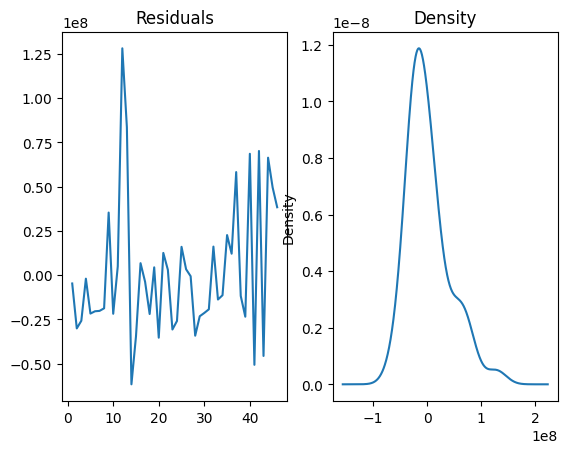

In [ ]:
#step 1
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

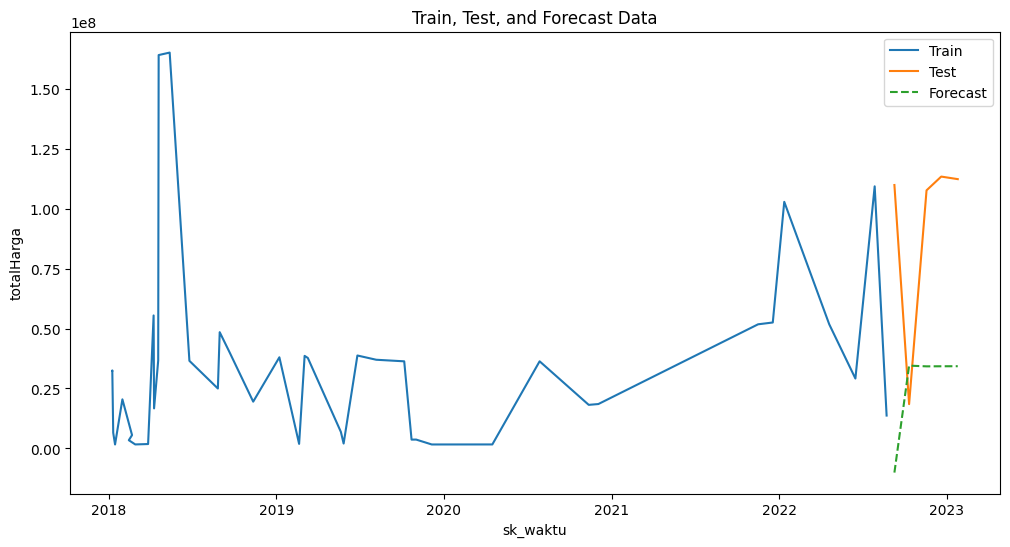

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Tentukan jumlah hari untuk data uji
test_days = 5

# Tentukan titik waktu untuk pemisahan data
split_point = sales_df.index[-test_days]

# Buat mask untuk data pelatihan dan pengujian
msk = (sales_df.index < split_point)
df_train = sales_df[msk][['sk_waktu', 'totalHarga']].copy()
df_test = sales_df[~msk][['sk_waktu', 'totalHarga']].copy()

# Konversi kolom 'sk_waktu' ke datetime
df_train['sk_waktu'] = pd.to_datetime(df_train['sk_waktu'], format='%Y%m%d')
df_test['sk_waktu'] = pd.to_datetime(df_test['sk_waktu'], format='%Y%m%d')

# Fit model pada data training dengan parameter ARIMA(2,0,2)
model = ARIMA(df_train['totalHarga'], order=(2,0,2))
model_fit = model.fit()

# Forecasting data testing
forecast_test = model_fit.forecast(steps=len(df_test))

# Tambahkan hasil forecast ke dataframe sales_df
sales_df['forecast_manual'] = None
sales_df.loc[~msk, 'forecast_manual'] = forecast_test.values

# Plot data train dan test dalam satu plot, beserta hasil forecast
plt.figure(figsize=(12, 6))
plt.plot(df_train['sk_waktu'], df_train['totalHarga'], label='Train')
plt.plot(df_test['sk_waktu'], df_test['totalHarga'], label='Test')
plt.plot(df_test['sk_waktu'], forecast_test, label='Forecast', linestyle='--')
plt.xlabel('sk_waktu')
plt.ylabel('totalHarga')
plt.title('Train, Test, and Forecast Data')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
#step 6
import pmdarima as pm

# Fit auto_arima model on 'totalHarga' column only
auto_arima_model = pm.auto_arima(df_train['totalHarga'], stepwise=False, seasonal=False)

# Print the summary of the chosen model
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -789.239
Date:                Sun, 11 Aug 2024   AIC                           1586.479
Time:                        08:48:09   BIC                           1593.429
Sample:                             0   HQIC                          1589.026
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6579      0.121      5.458      0.000       0.422       0.894
ar.L2         -0.2757      0.200     -1.381      0.167      -0.667       0.116
ar.L3          0.4084      0.141      2.905      0.0

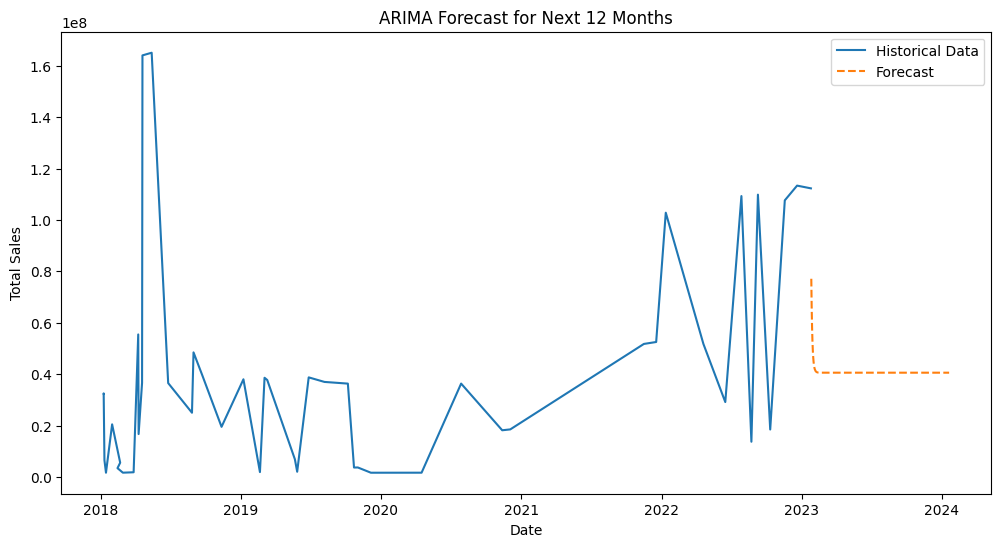

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Inisialisasi data (pastikan sales_df sudah ada dan memiliki kolom 'sk_waktu' dan 'totalHarga')
df_train = sales_df[['sk_waktu', 'totalHarga']].copy()

# Konversi kolom 'sk_waktu' ke datetime jika belum
df_train['sk_waktu'] = pd.to_datetime(df_train['sk_waktu'], format='%Y%m%d')

# Tentukan jumlah bulan untuk peramalan
forecast_months = 12

# Fit model pada data training dengan parameter ARIMA(2,0,2)
model = ARIMA(df_train['totalHarga'], order=(2, 0, 2))
model_fit = model.fit()

# Peramalan untuk 6 bulan ke depan
forecast_period = forecast_months * 30  # Anggap 1 bulan = 30 hari untuk kasus bulan
forecast_future = model_fit.forecast(steps=forecast_period)

# Tanggal mulai dan akhir untuk peramalan
start_date = df_train['sk_waktu'].max()
end_date = start_date + pd.DateOffset(days=forecast_period - 1)

# Buat range tanggal untuk hasil peramalan
forecast_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=forecast_period, freq='D')

# Plot data historis dan peramalan
plt.figure(figsize=(12, 6))
plt.plot(df_train['sk_waktu'], df_train['totalHarga'], label='Historical Data')
plt.plot(forecast_dates, forecast_future, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('ARIMA Forecast for Next 12 Months')
plt.legend()
plt.show()


In [ ]:
#step 6
import pmdarima as pm

# Fit auto_arima model on 'totalHarga' column only
auto_arima_model = pm.auto_arima(df_train['totalHarga'], stepwise=False, seasonal=False)

# Print the summary of the chosen model
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -889.382
Date:                Sun, 11 Aug 2024   AIC                           1784.763
Time:                        08:48:34   BIC                           1790.313
Sample:                             0   HQIC                          1786.852
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9539      0.080     11.886      0.000       0.797       1.111
ma.L1         -0.5700      0.154     -3.701      0.000      -0.872      -0.268
sigma2      1.715e+15        nan        nan        n

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the last 3 entries of the 'totalHarga' list in the 'data' dictionary
actual_values = df_test['totalHarga'][-3:].values

# Access the predicted values directly as forecast_test is a NumPy array
forecast_test1 = forecast_future[-3:]

# Calculate MAE and MSE
mae = mean_absolute_error(actual_values, forecast_test1)
mse = mean_squared_error(actual_values, forecast_test1)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((actual_values - forecast_test1) / actual_values)) * 100

# Print MAE, MSE, RMSE, and MAPE
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 70556568.65248229
Mean Squared Error (MSE): 4984440814913002.0
Root Mean Squared Error (RMSE): 70600572.34125657
Mean Absolute Percentage Error (MAPE): 63.47832676220108%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Asumsikan df_test berisi data aktual untuk periode peramalan
df_test = sales_df[['sk_waktu', 'totalHarga']].copy()
df_test['sk_waktu'] = pd.to_datetime(df_test['sk_waktu'], format='%Y%m%d')

# Sinkronkan forecast_future dengan df_test untuk periode yang sama
# Konversi forecast_future ke DataFrame dengan kolom yang sama dengan df_test
forecast_for_eval = pd.DataFrame({
    'sk_waktu': forecast_dates[:len(df_test)],
    'totalHarga': forecast_future[:len(df_test)]
}).reset_index(drop=True)

# Hapus baris dengan nilai aktual nol untuk menghindari pembagian dengan nol
non_zero_actuals = df_test[df_test['totalHarga'] != 0].reset_index(drop=True)
non_zero_forecast = forecast_for_eval.loc[non_zero_actuals.index, 'totalHarga']

# Hitung MAE
mae = mean_absolute_error(non_zero_actuals['totalHarga'], non_zero_forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Hitung MAPE
mape = np.mean(np.abs((non_zero_actuals['totalHarga'] - non_zero_forecast) / non_zero_actuals['totalHarga'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(non_zero_actuals['totalHarga'], non_zero_forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Hitung akurasi
accuracy = 100 - mape
print(f"Akurasi: {accuracy}%")


Mean Absolute Error (MAE): 32994589.602683514
Mean Absolute Percentage Error (MAPE): 512.3879196489113%
Root Mean Squared Error (RMSE): 43592980.69531741
Akurasi: -412.3879196489113%
